<a href="https://colab.research.google.com/github/pootpaddy/A1-Frontend-Fundamentals-Santander/blob/imgbot/ICD_21_Numpy_CasoDeEstudio_Poot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_icd.png">

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><h1 style="font-size:2em;color:#2467C0"> Numpy - Caso de estudio </h1></center>

<center><h4 style="font-size:2em;color:#840700">  Análisis de imagen satelital  </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="/content/sample_data/wifire.png" align="middle" style="width:500px"/></td>
<td align="left-align">

WIFIRE (https://wifire.ucsd.edu/) es un sistema integrado para el análisis de incendios forestales, con especial atención al cambio de la dinámica urbana y el clima. El sistema integra observaciones en red, como datos satelitales heterogéneos y datos de sensores remotos en tiempo real, con técnicas computacionales en procesamiento de señales, visualización, modelado y asimilación de datos para proporcionar un método escalable para monitorear fenómenos tales como patrones climáticos que pueden ayudar a predecir un incendio forestal. tasa de propagación.

En este ejemplo, analizaremos un conjunto de datos de una imagen satelital de la plataforma WIFIRE, utilizando el modulo Numpy.

    
<br>
</td>
</tr>
</table>

# Librerias

Cargando las bibliotecas que necesitamos : numpy, scipy, matplotlib 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as image 

Crear un arreglo numpy a partir de un archivo de imagen


In [9]:
photo_data = imageio.imread('/content/sample_data/sd-3layers.jpg')
# Imageio es una biblioteca de Python que proporciona una interfaz fácil para leer y escribir 
# una amplia gama de datos de imágenes, incluidas imágenes animadas, datos volumétricos y formatos científicos.
# conda install -c conda-forge imageio
# pip: pip install imageio

type(photo_data)



imageio.core.util.Array

Mostrando la imagen en pantalla

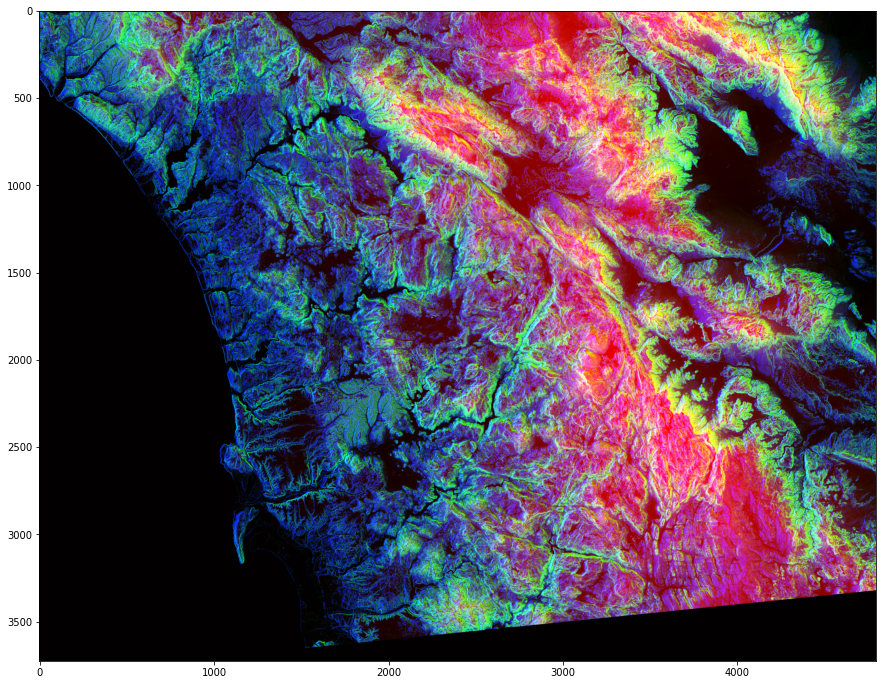

In [10]:
plt.figure(figsize=(15,16))
plt.imshow(photo_data)

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
   Encuentra las principales caracteristicas de la imagen .
</div>

In [12]:
print("Forma del arreglo:",photo_data.shape)
print("Numero de elementos:  "  )
print("Dimensión del arreglo:  ",  )
print("Valor del pixel con valor mínimo:  ",  )
print("Valor del pixel con valor máximo: ",  )
print("Promedio de los valores de los pixeles: ", )


Forma del arreglo: (3725, 4797, 3)
Numero de elementos:  
Dimensión del arreglo:  
Valor del pixel con valor mínimo:  
Valor del pixel con valor máximo: 
Promedio de los valores de los pixeles: 


La forma del arreglo muestra que contiene tres capas. Los primeros dos números aquí son largo(filas) y ancho(columnas), y el tercer número (es decir, 3) es para tres capas: rojo(Red-R), verde(Green-G) y azul(Blue-B).

<img align="left" width=70% src="/content/sample_data/imagen_rgb.png">



Mapeo de color RGB en la foto 
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
</p> 

<ul> 
    
<li><p style="font-family: Arial; font-size:1.175em;color:red; font-style:bold">
El píxel ROJO indica la altitud</p>
    
<p>&nbsp;</p>    
<li><p style="font-family: Arial; font-size:1.175em;color:green; font-style:bold">
El píxel VERDE indica pendiente
</p>

<p>&nbsp;</p>    
<li><p style="font-family: Arial; font-size:1.175em;color:blue; font-style:bold">
El píxel AZUL indica Aspecto
</p>
    
</ul>
<br>
Los valores más altos denotan mayor altitud, pendiente y aspecto.

<div class="alert alert-info">

__Aspecto__  

Cuando el terreno es plano, no hay pendiente. Entonces esto significa que no hay ningún aspecto.

Pero en las montañas, hay pendientes en todas las direcciones. Hay laderas orientadas al norte, oeste, sur y este. La dirección de la brújula que enfrenta la pendiente es el aspecto de la pendiente.

Algunas aplicaciones del parametro aspecto:

*  Los agricultores siembran cultivos según la cantidad de radiación solar entrante y los datos de aspecto.
*  En las pistas para skiar es necesario estudiar la orientación de la pendiente para evitar avalanchas.

https://gisgeography.com/slope-aspect-microclimate-south-facing/
    
</div>
<img align="left" width=95% src="figuras/aspecto.png">


Note que la pendiente puede tener un mismo valor en un punto de una montaña pero  el parámetro Aspect será diferente segun su orientación.

<img align="left" width=55% src="/content/sample_data/figuras/pendiente.png">


<div class="alert alert-success">
    <b>EJERCICIO: </b> 
   Muestre en un histograma los valores de los pixeles para cada canal, eliminando los pixeles menores o igual a 10
</div>

(array([1126759., 1334074., 1081996.,  831166.,  733959.,  767890.,
         618519.,  549583.,  537723.,  558961.,  650167.,  558100.,
         538429.,  523421.,  507514.,  501985.,  355012.,  282013.,
         249743.,  543216.]),
 array([ 11. ,  23.2,  35.4,  47.6,  59.8,  72. ,  84.2,  96.4, 108.6,
        120.8, 133. , 145.2, 157.4, 169.6, 181.8, 194. , 206.2, 218.4,
        230.6, 242.8, 255. ]),
 <a list of 20 Patch objects>)

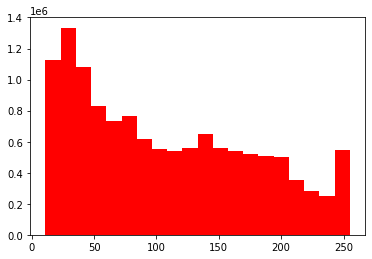

In [13]:
#Para el color rojo
plt.hist(photo_data[:,:,0][photo_data[:,:,0]>10], 20,  facecolor='r')


(array([1126759., 1334074., 1081996.,  831166.,  733959.,  767890.,
         618519.,  549583.,  537723.,  558961.,  650167.,  558100.,
         538429.,  523421.,  507514.,  501985.,  355012.,  282013.,
         249743.,  543216.]),
 array([ 11. ,  23.2,  35.4,  47.6,  59.8,  72. ,  84.2,  96.4, 108.6,
        120.8, 133. , 145.2, 157.4, 169.6, 181.8, 194. , 206.2, 218.4,
        230.6, 242.8, 255. ]),
 <a list of 20 Patch objects>)

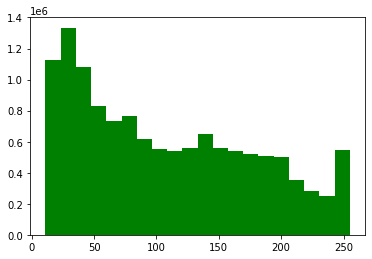

In [14]:
#Para el color verde
plt.hist(photo_data[:,:,0][photo_data[:,:,0]>10], 20,  facecolor='g')

(array([1126759., 1334074., 1081996.,  831166.,  733959.,  767890.,
         618519.,  549583.,  537723.,  558961.,  650167.,  558100.,
         538429.,  523421.,  507514.,  501985.,  355012.,  282013.,
         249743.,  543216.]),
 array([ 11. ,  23.2,  35.4,  47.6,  59.8,  72. ,  84.2,  96.4, 108.6,
        120.8, 133. , 145.2, 157.4, 169.6, 181.8, 194. , 206.2, 218.4,
        230.6, 242.8, 255. ]),
 <a list of 20 Patch objects>)

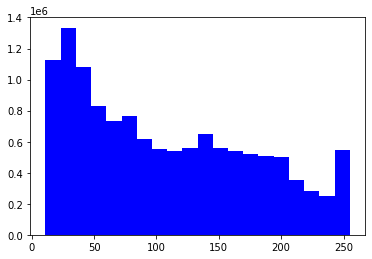

In [15]:
#Para el color azul
plt.hist(photo_data[:,:,0][photo_data[:,:,0]>10], 20,  facecolor='b')

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
    
   Para entender la geografia  haga un zoom  para estar entre las filas 1500 y 2500 y entre las columnas 2000 y 3500. Y muestre la capa del Aspecto con la opción *cmap='plasma'*
    
</div>



<img align="left" width=85% src="/content/zoom2.png">



Utilizando estilos de colores:

https://matplotlib.org/examples/color/colormaps_reference.html

<img align="left" width=85% src="figuras/plasma.png">


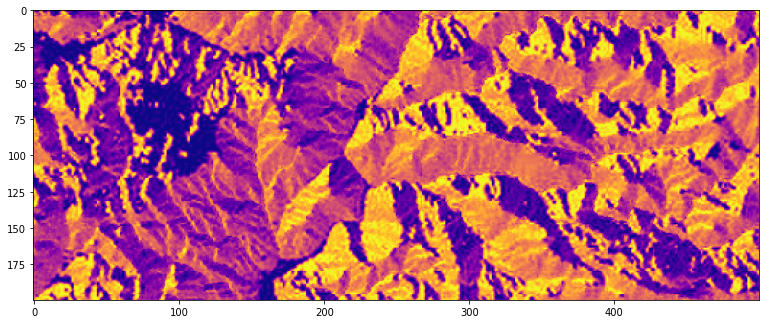

In [17]:
plt.figure(figsize=(13,13))
plt.imshow(photo_data[1900:2100,2500:3000][:,:,2],cmap='plasma')

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
   Para entender las variables de cada uno de los canales. 
    <ul>
  <li> a) Haga un zoom (en la imagen original)  para estar entre las filas 1900 y 2100 y entre las columnas 2500 y 3000 y guarde esta imagen(arreglo) con el nombre de img_zoom. Estama imagen servirá para los dos incisos siguientes  </li>
 <li> b) Utilizando la imagen  img_zoom muestre cada imagen por separado de sus canales</li>
 <li> c) Muestre la imagen figuras/mapa_california2.png para mostrar el terreno real (Puede usar una celda de texto con html)</li>
    </ul>
    
Puede hacer uso de las las opciones para cmap (uso: cmap='plasma' ) https://matplotlib.org/examples/color/colormaps_reference.html

</div>

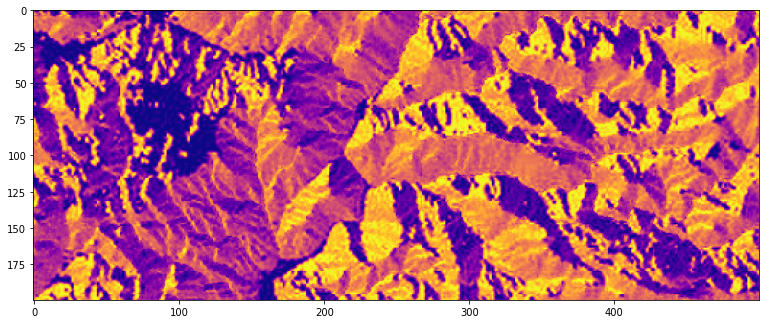

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as image
# Zoom
plt.figure(figsize=(13,13))
plt.imshow(photo_data[1900:2100,2500:3000][:,:,2],cmap='plasma')


array = np.arange(0, 737280, 1, np.uint8)
array = np.reshape(array, (1024, 720))

plt.imsave('img_zoom.png', array)

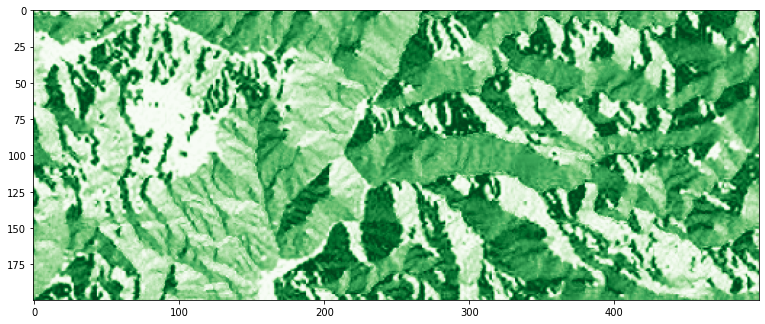

In [39]:
plt.figure(figsize=(13,13))
plt.imshow(photo_data[1900:2100,2500:3000][:,:,2],cmap='Greens')

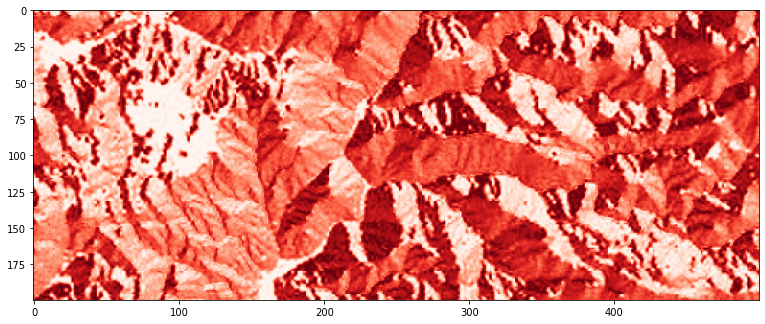

In [37]:
# Canal 1
plt.figure(figsize=(13,13))
plt.imshow(photo_data[1900:2100,2500:3000][:,:,2],cmap='Reds')

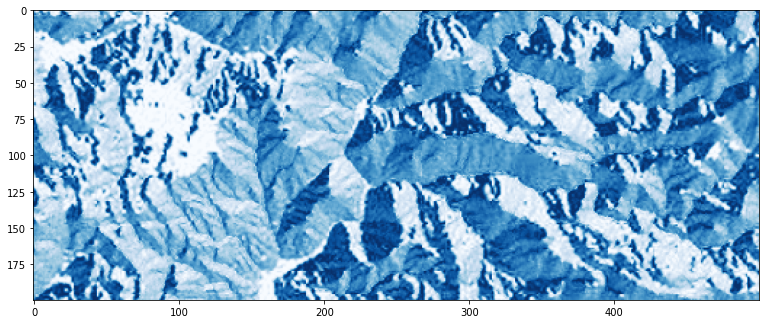

In [38]:
# Canal 2
plt.figure(figsize=(13,13))
plt.imshow(photo_data[1900:2100,2500:3000][:,:,2],cmap='Blues')

In [44]:
# mapa_california2



<img src="/content/sample_data/mapa_california2.png" >


<img align="left" width=50% src="figuras/NOMBRE-IMAGEN.png">

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
 Para resaltar la pequeña área utilizada en el ejercicio anterior, vuelva a cargar la imagen original y disminuya a los pixeles de cada canal en 100 unidades, con el fin de resaltar el área en toda la imagen, como se muestra en la figura siguiente. 
    
</div>

<img align="left" width=80% src="figuras/mapa_california3.png">

In [ ]:
photo_data = imageio.imread('figuras/sd-3layers.jpg')
#photo_data = imageio.imread('figuras/sd-3layers.jpg')

#Disminuir en 100 unidades solo el area del zoom

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
Tomando la imagen original se requieren generar dos imagenes una con una franja blanca y otra con una franja negra. ¿Cómo lograría esto? 
</div>

<img align="left" width=100% src="figuras/mapa_california4.png">

In [ ]:
#Franja blanca


In [ ]:
#Franja negra


<div class="alert alert-success">
    <b>EJERCICIO: </b> 
Una empresa solicita encontrar los puntos mas altos de la region para colocar antenas. ¿Como mostraria dicha informacion (Considere el valor de 230 como punto de partida para lo requerido)? 
</div>


<img align="left" width=50% src="figuras/antenas.png">


a) Una manera podría ser la de aislar solo los puntos que cumplen la condición y mostrarlos

In [ ]:
#Imagen original
photo_data = imageio.imread('figuras/sd-3layers.jpg')
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

#Imagen solo con puntos de interés
low_value_filter = photo_data[:,:,0] < 230
photo_data[:,:,0][low_value_filter] = 0
photo_data[:,:,1] = 0
photo_data[:,:,2] = 0

plt.figure(figsize=(10,10))
plt.imshow(photo_data)

b) Otra manera podría  ser resaltando los puntos en el mapa original

In [ ]:
photo_data = imageio.imread('figuras/sd-3layers.jpg')

plt.figure(figsize=(10,10))
plt.imshow(photo_data)


high_value_filter = photo_data[:,:,0] >= 230
low_value_filter = photo_data[:,:,0] < 230

photo_data[:,:,0][high_value_filter] = 255
photo_data[:,:,0][low_value_filter] = 0
#photo_data[:,:,1] = 0
#photo_data[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[4,5] 

<div class="alert alert-success">
    <b>EJERCICIO: </b> 
El club de escalada la ROCA desea conocer los lugares con mayor pendiente para realizar un evento de escalada. ¿Como mostraria dicha informacion (Considere el valores mayores a 250 para cumplir con lo requerido)?. Además será necesario hacer un zoom a alguna parte del mapa que cumplan la condición requerida

</div>


<img align="left" width=50% src="figuras/roca.png">


<div class="alert alert-success">
    <b>EJERCICIO: </b> 
Una empresa dedicada a la siembra de orquideas necesita conocer las lugares en donde la mayor parte del año no lleguen directamente los rayos del sol. ¿Como mostraria dicha informacion (Considere valores entre 180 y 200 para cumplir con lo requerido)? 
</div>


<img align="left" width=50% src="figuras/orquideas.png">



<div class="alert alert-success">
    <b>EJERCICIO: </b> 
Dibuje una linea diagonal de color blanco. (Suponga que es la diagonal de una matriz cuadrada)
</div>

In [ ]:
photo_data = imageio.imread('figuras/sd-3layers.jpg')

